In [361]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pickle
from sklearn.datasets import make_classification

## Part 1 - Linear Regression

### Problem 1 - Linear Regression with Direct Minimization

In [362]:
print('PROBLEM 1')
print('----------')

PROBLEM 1
----------


In [363]:
def learnOLERegression(X,y):
    # Inputs:                                                         
    # X = N x d 
    # y = N x 1                                                               
    # Output: 
    # w = d x 1 

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE    
    transpose_of_x = X.transpose() # transpose_of_x = d X N
    temp_left_operand = np.dot(transpose_of_x, X) # temp_left_operand = d X d
    left_operand = np.linalg.inv(temp_left_operand) # left_operand = d X d
    right_operand = np.dot(transpose_of_x, y) # right_operand = d X 1
    w = np.dot(left_operand, right_operand) # w = d X 1
    return w

In [364]:
def testOLERegression(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = N x 1
    # Output:
    # rmse = scalar value

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE    
    right_operand = np.dot(Xtest, w) # right_operand = N X 1
    squared_error = (ytest - right_operand)**2 # squared_error = N X 1
    mean_squared_error = np.sum(squared_error)/np.size(Xtest, 0) # mean_squared_error = scalar
    rmse = mean_squared_error**(1/2) # rmse = scalar
    return rmse

In [365]:
Xtrain,ytrain,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding='latin1')   
# add intercept
x1 = np.ones((len(Xtrain),1))
x2 = np.ones((len(Xtest),1))

Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

w = learnOLERegression(Xtrain,ytrain)
w_i = learnOLERegression(Xtrain_i,ytrain)

rmse = testOLERegression(w,Xtrain,ytrain)
rmse_i = testOLERegression(w_i,Xtrain_i,ytrain)
print('RMSE without intercept on train data - %.2f'%rmse)
print('RMSE with intercept on train data - %.2f'%rmse_i)

rmse = testOLERegression(w,Xtest,ytest)
rmse_i = testOLERegression(w_i,Xtest_i,ytest)
print('RMSE without intercept on test data - %.2f'%rmse)
print('RMSE with intercept on test data - %.2f'%rmse_i)


RMSE without intercept on train data - 138.20
RMSE with intercept on train data - 46.77
RMSE without intercept on test data - 326.76
RMSE with intercept on test data - 60.89


### Problem 2 - Linear Regression with Gradient Descent

In [366]:
print('PROBLEM 2')
print('----------')

PROBLEM 2
----------


In [367]:
def regressionObjVal(w, X, y):

    # compute squared error (scalar) with respect
    # to w (vector) for the given data X and y      
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = scalar value

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    right_operand = np.dot(w.transpose(), X.transpose()) # right_operand = N X 1
    loss_vector = (y.transpose() - right_operand)**2 # loss_vector = d X 1
    error = (np.sum(loss_vector))/2 # error = scalar 
    return error

In [368]:
def regressionGradient(w, X, y):

    # compute gradient of squared error (scalar) with respect
    # to w (vector) for the given data X and y   

    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # gradient = d length vector (not a d x 1 matrix)

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE  
    transpose_of_x = X.transpose() # transpose_of_x = d X N
    temp_left_operand = np.dot(X, w) # temp_left_operand = d X d
    left_operand = np.dot(transpose_of_x, temp_left_operand) # left_operand = d,
    right_operand = (np.dot(transpose_of_x, y)).flatten() # right_operand = d,
    error_grad = left_operand - right_operand # loss_vector = d,
    return error_grad

In [369]:
Xtrain,ytrain,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding='latin1')   
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)
args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w = np.transpose(np.array(soln.x))
w = w[:,np.newaxis]
rmse = testOLERegression(w,Xtrain_i,ytrain)
print('Gradient Descent Linear Regression RMSE on train data - %.2f'%rmse)
rmse = testOLERegression(w,Xtest_i,ytest)
print('Gradient Descent Linear Regression RMSE on test data - %.2f'%rmse)

Gradient Descent Linear Regression RMSE on train data - 48.09
Gradient Descent Linear Regression RMSE on test data - 54.74


## Part 2 - Linear Classification

### Problem 3 - Perceptron using Gradient Descent

In [370]:
print('PROBLEM 3')
print('----------')

PROBLEM 3
----------


In [371]:
def predictLinearModel(w,Xtest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # Output:
    # ypred = N x 1 vector of predictions

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    ypred = np.dot(Xtest, w) # ypred = N X 1
    ypred = np.where(ypred > 0, ypred, -1) # right_operand = N X 1
    ypred = np.where(ypred <= 0, ypred, 1) # right_operand = N X 1
    return ypred

In [372]:
def evaluateLinearModel(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = N x 1
    # Output:
    # acc = scalar values

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    size_of_data = np.size(ytest, 0) #size_of_data = scalar
    right_operand = predictLinearModel(w, Xtest) # right_operand = N X 1
    difference_of_true_label_and_predicted_label = ytest - right_operand # difference_of_true_label_and_predicted_label = N X 1
    number_of_non_zero = np.count_nonzero(difference_of_true_label_and_predicted_label) # number_of_zero = scalar
    acc = 1 - (number_of_non_zero/size_of_data) # acc = scalar
    return acc

In [373]:
Xtrain,ytrain, Xtest, ytest = np.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w = np.transpose(np.array(soln.x))
w = w[:,np.newaxis]
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('Perceptron Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('Perceptron Accuracy on test data - %.2f'%acc)

Perceptron Accuracy on train data - 0.84
Perceptron Accuracy on test data - 0.84


### Problem 4 - Logistic Regression Using Newton's Method

In [374]:
print('PROBLEM 4')
print('----------')

PROBLEM 4
----------


In [375]:
def logisticObjVal(w, X, y):

    # compute log-loss error (scalar) with respect
    # to w (vector) for the given data X and y                               
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = scalar
    
    
    if len(w.shape) == 1:
        w = w[:,np.newaxis]
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    transpose_of_w = w.transpose() # transpose_of_w = 1 X d
    error = 0 # error = scalar
    for i in range(np.size(y, 0)):
        exp_operand = -1 * np.dot( y[i] * transpose_of_w, X[i]) # exp_operand = 1,
        error = error + np.log(1 + np.exp(exp_operand)) # error = scalar
    error = error/(np.size(y, 0)) # error = scalar
    return error

In [376]:
def logisticGradient(w, X, y):

    # compute the gradient of the log-loss error (vector) with respect
    # to w (vector) for the given data X and y  
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = d length gradient vector (not a d x 1 matrix)

    if len(w.shape) == 1:
        w = w[:,np.newaxis]
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    transpose_of_w = w.transpose() # transpose_of_w = 1 X d
    gradient = np.zeros((w.shape[0],)) # gradient = d,
    for i in range(np.size(y, 0)):
        denominator = 1 + np.exp(np.dot(y[i] * transpose_of_w, X[i])) # denominator = 1,
        gradient = gradient + (y[i] / denominator) * X[i] # gradient = d,
    gradient = (-1/np.size(y,0)) * gradient # gradient = d,
    return gradient

In [377]:
def logisticHessian(w, X, y):

    # compute the Hessian of the log-loss error (matrix) with respect
    # to w (vector) for the given data X and y                               
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # Hessian = d x d matrix
    
    if len(w.shape) == 1:
        w = w[:,np.newaxis]
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    transpose_of_w = w.transpose() # transpose_of_w = 1 X d
    hessian = np.eye(X.shape[1]) # hessian = d X d
    for i in range(np.size(y, 0)):
        numerator = np.exp(np.dot(y[i] * transpose_of_w, X[i])) # numerator = 1,
        denominator = (1 + numerator)**2 # denominator = 1,
        hessian = hessian + (numerator/denominator) # hessian = 1,
    outer_product = np.dot(X.transpose(), X) # outer_product = d X d
    hessian = (hessian * outer_product)/np.size(y, 0) # hessian = d X d
    return hessian

In [378]:
Xtrain,ytrain, Xtest, ytest = np.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(logisticObjVal, w_init, jac=logisticGradient, hess=logisticHessian, args=args, method='Newton-CG', options=opts)
w = np.transpose(np.array(soln.x))
w = np.reshape(w,[len(w),1])
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('Logistic Regression Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('Logistic Regression Accuracy on test data - %.2f'%acc)

Logistic Regression Accuracy on train data - 0.84
Logistic Regression Accuracy on test data - 0.86


### Problem 5 - Support Vector Machines Using Gradient Descent

In [379]:
print('PROBLEM 5')
print('----------')

PROBLEM 5
----------


In [380]:
def trainSGDSVM(X,y,T,eta=0.01):
    # learn a linear SVM by implementing the SGD algorithm
    #
    # Inputs:
    # X = N x d
    # y = N x 1
    # T = number of iterations
    # eta = learning rate
    # Output:g 
    # weight vector, w = d x 1
    
    # IMPLEMENT THIS METHOD
    w = np.zeros([X.shape[1], 1]) # w = d X 1
    for t in range(T):
        i = np.random.randint(low=1, high=np.size(X,0)) # i = scalar
        gradient = np.dot(y[i] * w.transpose(), X[i]) # gradient = scalar
        if (gradient<1):
            w = w + ((eta * y[i] * X[i])[:,np.newaxis]) # w = d X 1
    return w

In [381]:
Xtrain,ytrain, Xtest, ytest = np.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
w = trainSGDSVM(Xtrain_i,ytrain,200,0.01)
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('SVM Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('SVM Accuracy on test data - %.2f'%acc)

SVM Accuracy on train data - 0.87
SVM Accuracy on test data - 0.88


### Problem 6 - Plotting decision boundaries

In [382]:
print('Problem 6')
print('---------')

Problem 6
---------


In [383]:
def plotBoundaries(w,X,y):
    # plotting boundaries

    mn = np.min(X,axis=0)
    mx = np.max(X,axis=0)
    x1 = np.linspace(mn[1],mx[1],100)
    x2 = np.linspace(mn[2],mx[2],100)
    xx1,xx2 = np.meshgrid(x1,x2)
    xx = np.zeros((x1.shape[0]*x2.shape[0],2))
    xx[:,0] = xx1.ravel()
    xx[:,1] = xx2.ravel()
    xx_i = np.concatenate((np.ones((xx.shape[0],1)), xx), axis=1)
    ypred = predictLinearModel(w,xx_i)
    ax.contourf(x1,x2,ypred.reshape((x1.shape[0],x2.shape[0])),alpha=0.3,cmap='cool')
    ax.scatter(X[:,1],X[:,2],c=y.flatten())

Text(0.5, 1.0, 'SVM')

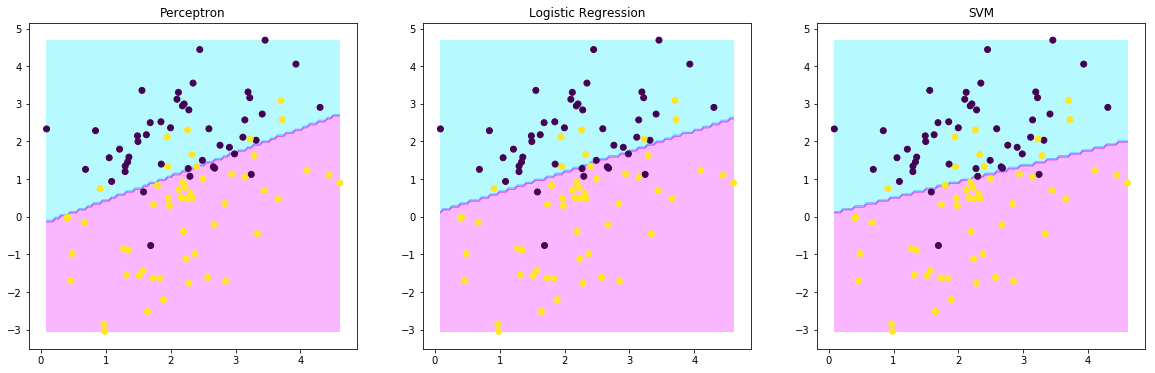

In [384]:
Xtrain,ytrain, Xtest, ytest = np.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

# Replace next three lines with code for learning w using the three methods
# w_perceptron = np.zeros((Xtrain_i.shape[1],1))
args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w = np.transpose(np.array(soln.x))
w_perceptron = w[:,np.newaxis]
# print(w_perceptron)

# w using logistic regression using Newton's method
# w_logistic = np.zeros((Xtrain_i.shape[1],1))
args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(logisticObjVal, w_init, jac=logisticGradient, hess=logisticHessian, args=args, method='Newton-CG', options=opts)
w = np.transpose(np.array(soln.x))
w_logistic = np.reshape(w,[len(w),1])
# print(w_logistic)

# w using SVM
# w_svm = np.zeros((Xtrain_i.shape[1],1))
w_svm = trainSGDSVM(Xtrain_i,ytrain,200,0.01)
# print(w_svm)

fig = plt.figure(figsize=(20,6))

ax = plt.subplot(1,3,1)
plotBoundaries(w_perceptron,Xtrain_i,ytrain)
ax.set_title('Perceptron')

ax = plt.subplot(1,3,2)
plotBoundaries(w_logistic,Xtrain_i,ytrain)
ax.set_title('Logistic Regression')

ax = plt.subplot(1,3,3)
plotBoundaries(w_svm,Xtrain_i,ytrain)
ax.set_title('SVM')
